In [3]:
import numpy as np
import matplotlib .pyplot as plt
import matplotlib .pyplot as op
import os
import pydot
import graphviz
import datetime as dt
import random
import cv2
from pathlib import Path
import glob
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,Dense,Dropout


for dirname, _, filenames in os.walk('E:\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\data\non-vehicles\extra1.png
E:\data\non-vehicles\extra10.png
E:\data\non-vehicles\extra100.png
E:\data\non-vehicles\extra1000.png
E:\data\non-vehicles\extra1001.png
E:\data\non-vehicles\extra1002.png
E:\data\non-vehicles\extra1003.png
E:\data\non-vehicles\extra1004.png
E:\data\non-vehicles\extra1005.png
E:\data\non-vehicles\extra1006.png
E:\data\non-vehicles\extra1007.png
E:\data\non-vehicles\extra1008.png
E:\data\non-vehicles\extra1009.png
E:\data\non-vehicles\extra101.png
E:\data\non-vehicles\extra1010.png
E:\data\non-vehicles\extra1011.png
E:\data\non-vehicles\extra1012.png
E:\data\non-vehicles\extra1013.png
E:\data\non-vehicles\extra1014.png
E:\data\non-vehicles\extra1015.png
E:\data\non-vehicles\extra102.png
E:\data\non-vehicles\extra103.png
E:\data\non-vehicles\extra1032.png
E:\data\non-vehicles\extra1033.png
E:\data\non-vehicles\extra1034.png
E:\data\non-vehicles\extra1035.png
E:\data\non-vehicles\extra1036.png
E:\data\non-vehicles\extra1037.png
E:\data\non-vehicles\extra103

E:\data\non-vehicles\extra2963.png
E:\data\non-vehicles\extra2964.png
E:\data\non-vehicles\extra2965.png
E:\data\non-vehicles\extra2966.png
E:\data\non-vehicles\extra2967.png
E:\data\non-vehicles\extra297.png
E:\data\non-vehicles\extra2971.png
E:\data\non-vehicles\extra298.png
E:\data\non-vehicles\extra2985.png
E:\data\non-vehicles\extra2986.png
E:\data\non-vehicles\extra299.png
E:\data\non-vehicles\extra2991.png
E:\data\non-vehicles\extra2992.png
E:\data\non-vehicles\extra2993.png
E:\data\non-vehicles\extra2994.png
E:\data\non-vehicles\extra2995.png
E:\data\non-vehicles\extra2996.png
E:\data\non-vehicles\extra2997.png
E:\data\non-vehicles\extra2998.png
E:\data\non-vehicles\extra3.png
E:\data\non-vehicles\extra30.png
E:\data\non-vehicles\extra300.png
E:\data\non-vehicles\extra3004.png
E:\data\non-vehicles\extra3005.png
E:\data\non-vehicles\extra3006.png
E:\data\non-vehicles\extra3007.png
E:\data\non-vehicles\extra3008.png
E:\data\non-vehicles\extra3009.png
E:\data\non-vehicles\extra301

E:\data\non-vehicles\extra4052.png
E:\data\non-vehicles\extra4053.png
E:\data\non-vehicles\extra4054.png
E:\data\non-vehicles\extra4055.png
E:\data\non-vehicles\extra4056.png
E:\data\non-vehicles\extra4057.png
E:\data\non-vehicles\extra4058.png
E:\data\non-vehicles\extra4059.png
E:\data\non-vehicles\extra406.png
E:\data\non-vehicles\extra4060.png
E:\data\non-vehicles\extra4061.png
E:\data\non-vehicles\extra4062.png
E:\data\non-vehicles\extra4063.png
E:\data\non-vehicles\extra4064.png
E:\data\non-vehicles\extra4065.png
E:\data\non-vehicles\extra4066.png
E:\data\non-vehicles\extra4067.png
E:\data\non-vehicles\extra4068.png
E:\data\non-vehicles\extra4069.png
E:\data\non-vehicles\extra407.png
E:\data\non-vehicles\extra4070.png
E:\data\non-vehicles\extra4071.png
E:\data\non-vehicles\extra4072.png
E:\data\non-vehicles\extra4073.png
E:\data\non-vehicles\extra4074.png
E:\data\non-vehicles\extra4075.png
E:\data\non-vehicles\extra4076.png
E:\data\non-vehicles\extra4077.png
E:\data\non-vehicles\e

E:\data\non-vehicles\extra5452.png
E:\data\non-vehicles\extra5453.png
E:\data\non-vehicles\extra5454.png
E:\data\non-vehicles\extra5455.png
E:\data\non-vehicles\extra5456.png
E:\data\non-vehicles\extra5457.png
E:\data\non-vehicles\extra5458.png
E:\data\non-vehicles\extra5459.png
E:\data\non-vehicles\extra546.png
E:\data\non-vehicles\extra5460.png
E:\data\non-vehicles\extra5461.png
E:\data\non-vehicles\extra5462.png
E:\data\non-vehicles\extra5463.png
E:\data\non-vehicles\extra5464.png
E:\data\non-vehicles\extra5465.png
E:\data\non-vehicles\extra5466.png
E:\data\non-vehicles\extra5467.png
E:\data\non-vehicles\extra5468.png
E:\data\non-vehicles\extra5469.png
E:\data\non-vehicles\extra547.png
E:\data\non-vehicles\extra5470.png
E:\data\non-vehicles\extra5471.png
E:\data\non-vehicles\extra5472.png
E:\data\non-vehicles\extra5473.png
E:\data\non-vehicles\extra5474.png
E:\data\non-vehicles\extra5475.png
E:\data\non-vehicles\extra5476.png
E:\data\non-vehicles\extra5477.png
E:\data\non-vehicles\e

E:\data\non-vehicles\image1343.png
E:\data\non-vehicles\image1344.png
E:\data\non-vehicles\image1345.png
E:\data\non-vehicles\image1346.png
E:\data\non-vehicles\image1347.png
E:\data\non-vehicles\image1348.png
E:\data\non-vehicles\image1349.png
E:\data\non-vehicles\image135.png
E:\data\non-vehicles\image1350.png
E:\data\non-vehicles\image1351.png
E:\data\non-vehicles\image1352.png
E:\data\non-vehicles\image1353.png
E:\data\non-vehicles\image1354.png
E:\data\non-vehicles\image1355.png
E:\data\non-vehicles\image1356.png
E:\data\non-vehicles\image1357.png
E:\data\non-vehicles\image1358.png
E:\data\non-vehicles\image1359.png
E:\data\non-vehicles\image136.png
E:\data\non-vehicles\image1360.png
E:\data\non-vehicles\image1361.png
E:\data\non-vehicles\image1362.png
E:\data\non-vehicles\image1363.png
E:\data\non-vehicles\image1364.png
E:\data\non-vehicles\image1365.png
E:\data\non-vehicles\image1366.png
E:\data\non-vehicles\image1367.png
E:\data\non-vehicles\image1368.png
E:\data\non-vehicles\i

E:\data\non-vehicles\image2242.png
E:\data\non-vehicles\image2243.png
E:\data\non-vehicles\image2244.png
E:\data\non-vehicles\image2245.png
E:\data\non-vehicles\image2246.png
E:\data\non-vehicles\image2247.png
E:\data\non-vehicles\image2248.png
E:\data\non-vehicles\image2249.png
E:\data\non-vehicles\image225.png
E:\data\non-vehicles\image2250.png
E:\data\non-vehicles\image2251.png
E:\data\non-vehicles\image2252.png
E:\data\non-vehicles\image2253.png
E:\data\non-vehicles\image2254.png
E:\data\non-vehicles\image2255.png
E:\data\non-vehicles\image2256.png
E:\data\non-vehicles\image2257.png
E:\data\non-vehicles\image2258.png
E:\data\non-vehicles\image2259.png
E:\data\non-vehicles\image226.png
E:\data\non-vehicles\image2260.png
E:\data\non-vehicles\image2261.png
E:\data\non-vehicles\image2262.png
E:\data\non-vehicles\image2263.png
E:\data\non-vehicles\image2264.png
E:\data\non-vehicles\image2265.png
E:\data\non-vehicles\image2266.png
E:\data\non-vehicles\image2267.png
E:\data\non-vehicles\i

E:\data\non-vehicles\image3593.png
E:\data\non-vehicles\image3594.png
E:\data\non-vehicles\image3595.png
E:\data\non-vehicles\image3596.png
E:\data\non-vehicles\image3597.png
E:\data\non-vehicles\image3598.png
E:\data\non-vehicles\image3599.png
E:\data\non-vehicles\image36.png
E:\data\non-vehicles\image360.png
E:\data\non-vehicles\image3600.png
E:\data\non-vehicles\image3601.png
E:\data\non-vehicles\image3602.png
E:\data\non-vehicles\image3603.png
E:\data\non-vehicles\image3604.png
E:\data\non-vehicles\image3605.png
E:\data\non-vehicles\image3606.png
E:\data\non-vehicles\image3607.png
E:\data\non-vehicles\image3608.png
E:\data\non-vehicles\image3609.png
E:\data\non-vehicles\image361.png
E:\data\non-vehicles\image3610.png
E:\data\non-vehicles\image3611.png
E:\data\non-vehicles\image3612.png
E:\data\non-vehicles\image3613.png
E:\data\non-vehicles\image3614.png
E:\data\non-vehicles\image3615.png
E:\data\non-vehicles\image3616.png
E:\data\non-vehicles\image3617.png
E:\data\non-vehicles\ima

E:\data\vehicles\1.png
E:\data\vehicles\10.png
E:\data\vehicles\1000.png
E:\data\vehicles\1001.png
E:\data\vehicles\1002.png
E:\data\vehicles\1003.png
E:\data\vehicles\1004.png
E:\data\vehicles\1005.png
E:\data\vehicles\1006.png
E:\data\vehicles\1007.png
E:\data\vehicles\1008.png
E:\data\vehicles\1009.png
E:\data\vehicles\101.png
E:\data\vehicles\1010.png
E:\data\vehicles\1011.png
E:\data\vehicles\1012.png
E:\data\vehicles\1013.png
E:\data\vehicles\1014.png
E:\data\vehicles\1015.png
E:\data\vehicles\1016.png
E:\data\vehicles\1017.png
E:\data\vehicles\1018.png
E:\data\vehicles\1019.png
E:\data\vehicles\102.png
E:\data\vehicles\1020.png
E:\data\vehicles\1021.png
E:\data\vehicles\1022.png
E:\data\vehicles\1023.png
E:\data\vehicles\1024.png
E:\data\vehicles\1025.png
E:\data\vehicles\1026.png
E:\data\vehicles\1027.png
E:\data\vehicles\1028.png
E:\data\vehicles\1029.png
E:\data\vehicles\103.png
E:\data\vehicles\1030.png
E:\data\vehicles\1031.png
E:\data\vehicles\1032.png
E:\data\vehicles\103

E:\data\vehicles\1856.png
E:\data\vehicles\1857.png
E:\data\vehicles\1858.png
E:\data\vehicles\1859.png
E:\data\vehicles\1860.png
E:\data\vehicles\1861.png
E:\data\vehicles\1862.png
E:\data\vehicles\1863.png
E:\data\vehicles\1864.png
E:\data\vehicles\1865.png
E:\data\vehicles\1866.png
E:\data\vehicles\1867.png
E:\data\vehicles\1868.png
E:\data\vehicles\1869.png
E:\data\vehicles\187.png
E:\data\vehicles\1870.png
E:\data\vehicles\1871.png
E:\data\vehicles\1872.png
E:\data\vehicles\1873.png
E:\data\vehicles\1874.png
E:\data\vehicles\1875.png
E:\data\vehicles\1876.png
E:\data\vehicles\1877.png
E:\data\vehicles\1878.png
E:\data\vehicles\1879.png
E:\data\vehicles\188.png
E:\data\vehicles\1880.png
E:\data\vehicles\1881.png
E:\data\vehicles\1882.png
E:\data\vehicles\1883.png
E:\data\vehicles\1884.png
E:\data\vehicles\1885.png
E:\data\vehicles\1886.png
E:\data\vehicles\1887.png
E:\data\vehicles\1888.png
E:\data\vehicles\1889.png
E:\data\vehicles\189.png
E:\data\vehicles\1890.png
E:\data\vehicle

E:\data\vehicles\2484.png
E:\data\vehicles\2485.png
E:\data\vehicles\2486.png
E:\data\vehicles\2487.png
E:\data\vehicles\2488.png
E:\data\vehicles\2489.png
E:\data\vehicles\249.png
E:\data\vehicles\2490.png
E:\data\vehicles\2491.png
E:\data\vehicles\2492.png
E:\data\vehicles\2493.png
E:\data\vehicles\2494.png
E:\data\vehicles\2495.png
E:\data\vehicles\2496.png
E:\data\vehicles\2497.png
E:\data\vehicles\2498.png
E:\data\vehicles\2499.png
E:\data\vehicles\25.png
E:\data\vehicles\250.png
E:\data\vehicles\2500.png
E:\data\vehicles\2501.png
E:\data\vehicles\2502.png
E:\data\vehicles\2503.png
E:\data\vehicles\2504.png
E:\data\vehicles\2505.png
E:\data\vehicles\2506.png
E:\data\vehicles\2507.png
E:\data\vehicles\2508.png
E:\data\vehicles\2509.png
E:\data\vehicles\251.png
E:\data\vehicles\2510.png
E:\data\vehicles\2511.png
E:\data\vehicles\2512.png
E:\data\vehicles\2513.png
E:\data\vehicles\2514.png
E:\data\vehicles\2515.png
E:\data\vehicles\2516.png
E:\data\vehicles\2517.png
E:\data\vehicles\

E:\data\vehicles\3684.png
E:\data\vehicles\3685.png
E:\data\vehicles\3686.png
E:\data\vehicles\3687.png
E:\data\vehicles\3688.png
E:\data\vehicles\3689.png
E:\data\vehicles\369.png
E:\data\vehicles\3690.png
E:\data\vehicles\3691.png
E:\data\vehicles\3692.png
E:\data\vehicles\3693.png
E:\data\vehicles\3694.png
E:\data\vehicles\3695.png
E:\data\vehicles\3696.png
E:\data\vehicles\3697.png
E:\data\vehicles\3698.png
E:\data\vehicles\3699.png
E:\data\vehicles\37.png
E:\data\vehicles\370.png
E:\data\vehicles\3700.png
E:\data\vehicles\3701.png
E:\data\vehicles\3702.png
E:\data\vehicles\3703.png
E:\data\vehicles\3704.png
E:\data\vehicles\3705.png
E:\data\vehicles\3706.png
E:\data\vehicles\3707.png
E:\data\vehicles\3708.png
E:\data\vehicles\3709.png
E:\data\vehicles\371.png
E:\data\vehicles\3710.png
E:\data\vehicles\3711.png
E:\data\vehicles\3712.png
E:\data\vehicles\3713.png
E:\data\vehicles\3714.png
E:\data\vehicles\3715.png
E:\data\vehicles\3716.png
E:\data\vehicles\3717.png
E:\data\vehicles\

E:\data\vehicles\5032.png
E:\data\vehicles\5033.png
E:\data\vehicles\5034.png
E:\data\vehicles\5035.png
E:\data\vehicles\5036.png
E:\data\vehicles\5037.png
E:\data\vehicles\5038.png
E:\data\vehicles\5039.png
E:\data\vehicles\504.png
E:\data\vehicles\5040.png
E:\data\vehicles\5041.png
E:\data\vehicles\5042.png
E:\data\vehicles\5043.png
E:\data\vehicles\5044.png
E:\data\vehicles\5045.png
E:\data\vehicles\5046.png
E:\data\vehicles\5047.png
E:\data\vehicles\5048.png
E:\data\vehicles\5049.png
E:\data\vehicles\505.png
E:\data\vehicles\5050.png
E:\data\vehicles\5051.png
E:\data\vehicles\5052.png
E:\data\vehicles\5053.png
E:\data\vehicles\5054.png
E:\data\vehicles\5055.png
E:\data\vehicles\5056.png
E:\data\vehicles\5057.png
E:\data\vehicles\5058.png
E:\data\vehicles\5059.png
E:\data\vehicles\506.png
E:\data\vehicles\5060.png
E:\data\vehicles\5061.png
E:\data\vehicles\5062.png
E:\data\vehicles\5063.png
E:\data\vehicles\5064.png
E:\data\vehicles\5065.png
E:\data\vehicles\5066.png
E:\data\vehicle

E:\data\vehicles\937.png
E:\data\vehicles\938.png
E:\data\vehicles\939.png
E:\data\vehicles\94.png
E:\data\vehicles\940.png
E:\data\vehicles\941.png
E:\data\vehicles\942.png
E:\data\vehicles\943.png
E:\data\vehicles\944.png
E:\data\vehicles\945.png
E:\data\vehicles\946.png
E:\data\vehicles\947.png
E:\data\vehicles\948.png
E:\data\vehicles\949.png
E:\data\vehicles\95.png
E:\data\vehicles\950.png
E:\data\vehicles\951.png
E:\data\vehicles\952.png
E:\data\vehicles\953.png
E:\data\vehicles\954.png
E:\data\vehicles\955.png
E:\data\vehicles\956.png
E:\data\vehicles\957.png
E:\data\vehicles\958.png
E:\data\vehicles\959.png
E:\data\vehicles\96.png
E:\data\vehicles\960.png
E:\data\vehicles\961.png
E:\data\vehicles\962.png
E:\data\vehicles\963.png
E:\data\vehicles\964.png
E:\data\vehicles\965.png
E:\data\vehicles\966.png
E:\data\vehicles\967.png
E:\data\vehicles\968.png
E:\data\vehicles\969.png
E:\data\vehicles\97.png
E:\data\vehicles\970.png
E:\data\vehicles\971.png
E:\data\vehicles\972.png
E:\d

E:\data\vehicles\left (26).png
E:\data\vehicles\left (260).png
E:\data\vehicles\left (261).png
E:\data\vehicles\left (262).png
E:\data\vehicles\left (263).png
E:\data\vehicles\left (264).png
E:\data\vehicles\left (265).png
E:\data\vehicles\left (266).png
E:\data\vehicles\left (267).png
E:\data\vehicles\left (268).png
E:\data\vehicles\left (269).png
E:\data\vehicles\left (27).png
E:\data\vehicles\left (270).png
E:\data\vehicles\left (271).png
E:\data\vehicles\left (272).png
E:\data\vehicles\left (273).png
E:\data\vehicles\left (274).png
E:\data\vehicles\left (275).png
E:\data\vehicles\left (276).png
E:\data\vehicles\left (277).png
E:\data\vehicles\left (278).png
E:\data\vehicles\left (279).png
E:\data\vehicles\left (28).png
E:\data\vehicles\left (280).png
E:\data\vehicles\left (281).png
E:\data\vehicles\left (282).png
E:\data\vehicles\left (283).png
E:\data\vehicles\left (284).png
E:\data\vehicles\left (285).png
E:\data\vehicles\left (286).png
E:\data\vehicles\left (287).png
E:\data\veh

E:\data\vehicles\middle (371).png
E:\data\vehicles\middle (372).png
E:\data\vehicles\middle (373).png
E:\data\vehicles\middle (374).png
E:\data\vehicles\middle (375).png
E:\data\vehicles\middle (376).png
E:\data\vehicles\middle (377).png
E:\data\vehicles\middle (378).png
E:\data\vehicles\middle (379).png
E:\data\vehicles\middle (38).png
E:\data\vehicles\middle (380).png
E:\data\vehicles\middle (381).png
E:\data\vehicles\middle (382).png
E:\data\vehicles\middle (383).png
E:\data\vehicles\middle (384).png
E:\data\vehicles\middle (385).png
E:\data\vehicles\middle (386).png
E:\data\vehicles\middle (387).png
E:\data\vehicles\middle (388).png
E:\data\vehicles\middle (389).png
E:\data\vehicles\middle (39).png
E:\data\vehicles\middle (390).png
E:\data\vehicles\middle (391).png
E:\data\vehicles\middle (392).png
E:\data\vehicles\middle (393).png
E:\data\vehicles\middle (394).png
E:\data\vehicles\middle (395).png
E:\data\vehicles\middle (396).png
E:\data\vehicles\middle (397).png
E:\data\vehicles

In [ ]:
maindir = "E:\data"
os.listdir(maindir)

In [4]:
vehicle_dir = "E/data/vehicles"
nonvehicle_dir = "E/data/non-vehicles"
vehicle = os.listdir(maindir+"/vehicles")
non_vehicle = os.listdir(maindir+"/non-vehicles")

print(f"Number of Vehicle Images: {len(vehicle)}")
print(f"Number of Non Vehicle Images: {len(non_vehicle)}")

Number of Vehicle Images: 8792
Number of Non Vehicle Images: 8968


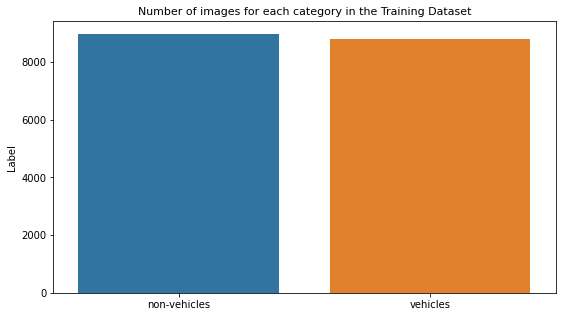

In [5]:
# Selecting Dataset Folder Paths
dir_ = Path('E:\data')
filepaths = list(dir_.glob(r'**/*.png'))
# Mapping the labels
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# Paths & labels femalee eyes
filepaths = pd.Series(filepaths, name = 'File').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenating...
df = pd.concat([filepaths, labels], axis=1)

df = df.sample(frac = 1, random_state = 56).reset_index(drop = True)

vc = df['Label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

In [6]:
plt.style.use("dark_background")

Text(0.5, 1.0, 'non-vehicles')

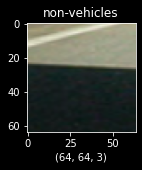

In [8]:
figure = plt.figure(figsize=(2,2))
x = plt.imread(df["File"][34])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][34])


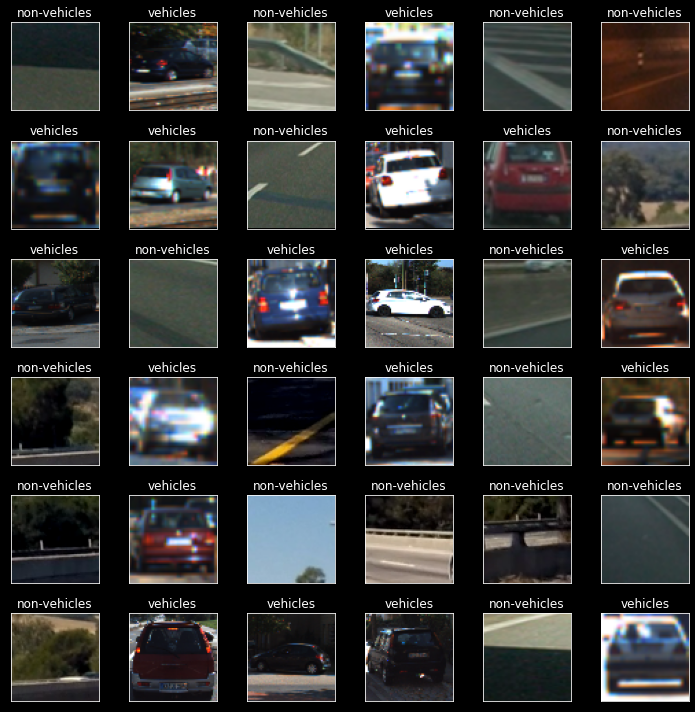

In [9]:
fig, axes = plt.subplots(nrows = 6,
                        ncols = 6,
                        figsize = (10, 10),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["File"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

In [10]:
trainset_df, testset_df = train_test_split(df, train_size = 0.90, random_state = 42)

display(trainset_df.head())

testset_df.head()


,File,Label
5758,E:\data\non-vehicles\extra3217.png,non-vehicles
11522,E:\data\vehicles\3533.png,vehicles
3143,E:\data\vehicles\left (229).png,vehicles
8774,E:\data\non-vehicles\image801.png,non-vehicles
9845,E:\data\vehicles\1274.png,vehicles


,File,Label
15314,E:\data\non-vehicles\image3846.png,non-vehicles
11728,E:\data\non-vehicles\image562.png,non-vehicles
10379,E:\data\vehicles\2287.png,vehicles
6323,E:\data\vehicles\3759.png,vehicles
5155,E:\data\vehicles\4221.png,vehicles


In [11]:
LE = LabelEncoder()

y_test = LE.fit_transform(testset_df["Label"])


In [12]:
print('Training Dataset:')

print(f'Number of images: {trainset_df.shape[0]}')

print(f'Number of images with vehicle: {trainset_df["Label"].value_counts()[0]}')
print(f'Number of images with non vehicle: {trainset_df["Label"].value_counts()[1]}\n')

# Viewing data in test dataset
print('Test Dataset:')

print(f'Number of images: {testset_df.shape[0]}')

print(f'Number of images with vehicle: {testset_df["Label"].value_counts()[0]}')
print(f'Number of images with non vehicle: {testset_df["Label"].value_counts()[1]}\n')


Training Dataset:
Number of images: 15984
Number of images with vehicle: 8076
Number of images with non vehicle: 7908

Test Dataset:
Number of images: 1776
Number of images with vehicle: 892
Number of images with non vehicle: 884



In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
print("Preparing the training dataset ...")
training_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")
print("Preparing the validation dataset ...")
validation_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")
print("Preparing the test dataset ...")
test_set = test_datagen.flow_from_dataframe(
    dataframe = testset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    shuffle = False,
    batch_size = 32)

print('Data generators are ready!')

Preparing the training dataset ...
Found 14386 validated image filenames belonging to 2 classes.
Preparing the validation dataset ...
Found 1598 validated image filenames belonging to 2 classes.
Preparing the test dataset ...
Found 1776 validated image filenames belonging to 2 classes.
Data generators are ready!


PNG
RGB
(64, 64)


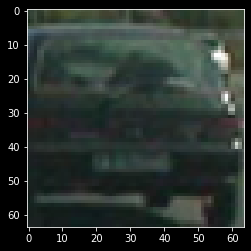

In [15]:

from PIL import Image, ImageEnhance
import random
file_path_type = ["E:/data/vehicles/*.png"]
images = glob.glob(random.choice(file_path_type))
random_image = random.choice(images)
imgo = Image.open(random_image)
print(imgo.format)
print(imgo.mode)
print(imgo.size)

#show the image
plt.imshow(imgo)






In [16]:
#CNN Model
#INCEPTION


#1. Base model creation

CNN_base_inc = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

for layer in CNN_base_inc.layers:
    layer.trainable = False
    
#2. Flattening

x = layers.Flatten()(CNN_base_inc.output)

In [17]:
#3. Dense Neural Network

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation='sigmoid')(x)
cb=0;
CNN_inc = Model(CNN_base_inc.input, x)

#4. Model Compilation & Training

CNN_inc.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_inc_history = CNN_inc.fit(training_set, epochs = 25, validation_data = validation_set, callbacks = cb)

# End of Time Counting
end = dt.datetime.now()
time_CNN_inc = end - start
print ('\nTraining and validation time is: ', time_CNN_inc)


C:\Users\hp\anaconda3\envs\python1\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/25
450/450 [==============================] - 268s 572ms/step - loss: 0.1468 - accuracy: 0.9520 - val_loss: 0.0742 - val_accuracy: 0.9750
Epoch 2/25
450/450 [==============================] - 181s 403ms/step - loss: 0.0799 - accuracy: 0.9725 - val_loss: 0.0635 - val_accuracy: 0.9825
Epoch 3/25
450/450 [==============================] - 179s 397ms/step - loss: 0.0711 - accuracy: 0.9747 - val_loss: 0.0763 - val_accuracy: 0.9743
Epoch 4/25
450/450 [==============================] - 193s 428ms/step - loss: 0.0651 - accuracy: 0.9763 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 5/25
450/450 [==============================] - 186s 413ms/step - loss: 0.0665 - accuracy: 0.9771 - val_loss: 0.0773 - val_accuracy: 0.9750
Epoch 6/25
450/450 [==============================] - 185s 410ms/step - loss: 0.0600 - accuracy: 0.9794 - val_loss: 0.0644 - val_accuracy: 0.9787
Epoch 7/25
450/450 [==============================] - 187s 415ms/step - loss: 0.0588 - accuracy: 0.9794 - val_loss: 0.0527 -

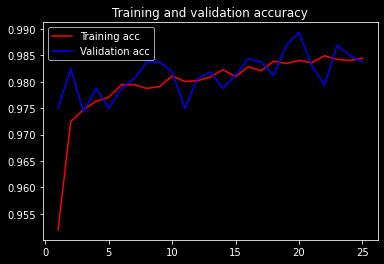

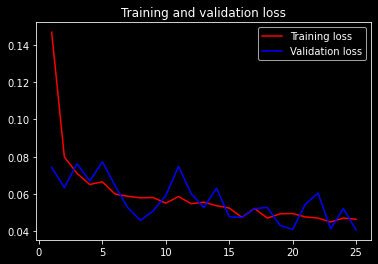

In [18]:
# 5.Model training history

acc = CNN_inc_history.history['accuracy']
val_acc = CNN_inc_history.history['val_accuracy']
loss = CNN_inc_history.history['loss']
val_loss = CNN_inc_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [19]:
# 6.Viewing results and generating forecasts

score_inc = CNN_inc.evaluate(test_set)
print("Test Loss:", score_inc[0])
print("Test Accuracy:", score_inc[1])

56/56 [==============================] - 16s 279ms/step - loss: 0.0338 - accuracy: 0.9910
Test Loss: 0.0337829627096653
Test Accuracy: 0.9909909963607788


In [21]:
y_pred_inc = CNN_inc.predict(test_set)
y_pred_inc = np.round(y_pred_inc)

recall_inc = recall_score(y_test, y_pred_inc)
precision_inc = precision_score(y_test, y_pred_inc)
f1_inc = f1_score(y_test, y_pred_inc)
roc_inc = roc_auc_score(y_test, y_pred_inc)

print(classification_report(y_test, y_pred_inc))

56/56 [==============================] - 14s 246ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       892
           1       0.98      1.00      0.99       884

    accuracy                           0.99      1776
   macro avg       0.99      0.99      0.99      1776
weighted avg       0.99      0.99      0.99      1776



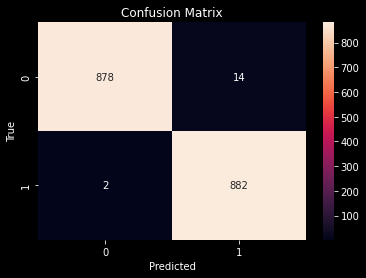

In [22]:
plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_inc),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [23]:
CNN_base_mobilenet = MobileNet(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

In [24]:
#XCEPTIONN
# 1.Base model creation
CNN_base_xcep = Xception(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')
CNN_base_xcep.trainable = False

In [25]:
#2.Dense Neural Networks
CNN_xcep = Sequential()
CNN_xcep.add(CNN_base_xcep)
CNN_xcep.add(GlobalAveragePooling2D())
CNN_xcep.add(Dense(128))
CNN_xcep.add(Dropout(0.1))
CNN_xcep.add(Dense(1, activation = 'sigmoid'))

CNN_xcep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,123,881
Trainable params: 262,401
Non-trainable params: 20,861,480
______________________________________

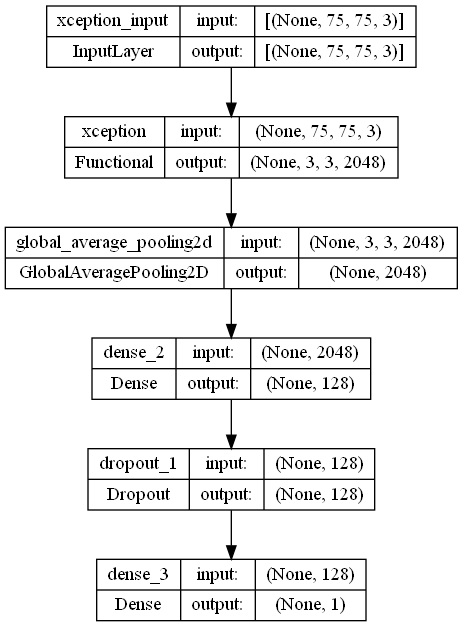

In [26]:
plot_model(CNN_xcep, show_layer_names = True , show_shapes = True)

In [27]:
# 4. Model compilation and training
# Compilation
CNN_xcep.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_xcep_history = CNN_xcep.fit(training_set, epochs = 25, validation_data = validation_set, callbacks = cb)

# End of Time Counting
end = dt.datetime.now()
time_CNN_xcep = end - start
print ('\nTraining and validation time: ', time_CNN_xcep)

Epoch 1/25
450/450 [==============================] - 350s 767ms/step - loss: 0.1073 - accuracy: 0.9716 - val_loss: 0.0654 - val_accuracy: 0.9844
Epoch 2/25
450/450 [==============================] - 375s 833ms/step - loss: 0.0673 - accuracy: 0.9826 - val_loss: 0.0967 - val_accuracy: 0.9806
Epoch 3/25
450/450 [==============================] - 376s 836ms/step - loss: 0.0620 - accuracy: 0.9840 - val_loss: 0.0466 - val_accuracy: 0.9869
Epoch 4/25
450/450 [==============================] - 351s 779ms/step - loss: 0.0491 - accuracy: 0.9866 - val_loss: 0.0406 - val_accuracy: 0.9894
Epoch 5/25
450/450 [==============================] - 340s 756ms/step - loss: 0.0496 - accuracy: 0.9868 - val_loss: 0.0884 - val_accuracy: 0.9750
Epoch 6/25
450/450 [==============================] - 339s 753ms/step - loss: 0.0436 - accuracy: 0.9876 - val_loss: 0.0513 - val_accuracy: 0.9862
Epoch 7/25
450/450 [==============================] - 336s 747ms/step - loss: 0.0392 - accuracy: 0.9895 - val_loss: 0.0328 -

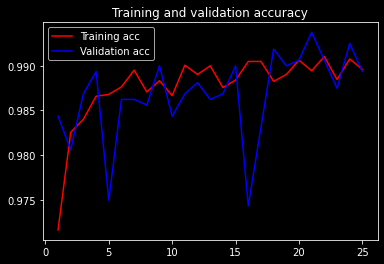

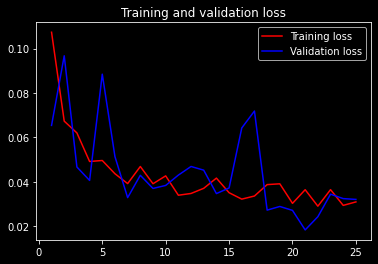

In [29]:
# 5.Model training history

acc = CNN_xcep_history.history['accuracy']
val_acc = CNN_xcep_history.history['val_accuracy']
loss = CNN_xcep_history.history['loss']
val_loss = CNN_xcep_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [30]:
# 6.Viewing results and generating forecasts

score_xcep = CNN_xcep.evaluate(test_set)
print("Test Loss:", score_xcep[0])
print("Test Accuracy:", score_xcep[1])

56/56 [==============================] - 50s 883ms/step - loss: 0.0301 - accuracy: 0.9893
Test Loss: 0.030061062425374985
Test Accuracy: 0.9893018007278442


In [31]:
y_pred_xcep = CNN_xcep.predict(test_set)
y_pred_xcep = np.round(y_pred_xcep)

recall_xcep = recall_score(y_test, y_pred_xcep)
precision_xcep = precision_score(y_test, y_pred_xcep)
f1_xcep = f1_score(y_test, y_pred_xcep)
roc_xcep = roc_auc_score(y_test, y_pred_xcep)

56/56 [==============================] - 42s 721ms/step


In [32]:
print(classification_report(y_test, y_pred_xcep))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       892
           1       1.00      0.98      0.99       884

    accuracy                           0.99      1776
   macro avg       0.99      0.99      0.99      1776
weighted avg       0.99      0.99      0.99      1776



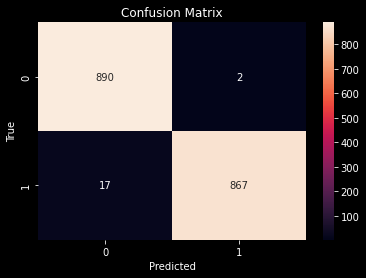

In [33]:
plt.figure(figsize = (6, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_xcep),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [34]:
# 7. Viewing the results of all models

models= [('Inception', time_CNN_inc, np.mean(CNN_inc_history.history['accuracy']), np.mean(CNN_inc_history.history['val_accuracy'])),
         ('Xception', time_CNN_xcep, np.mean(CNN_xcep_history.history['accuracy']), np.mean(CNN_xcep_history.history['val_accuracy'])),
        ]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Time', 'Training accuracy (%)', 'Validation Accuracy (%)'])

df_all_models

,Model,Time,Training accuracy (%),Validation Accuracy (%)
0,Inception,0 days 01:17:47.967123,0.979680,0.981402
1,Xception,0 days 02:22:38.071220,0.987755,0.986809


In [35]:
models = [('Inception', score_inc[1], recall_inc, precision_inc, f1_inc, roc_inc),
          ('Xception', score_xcep[1], recall_xcep, precision_xcep, f1_xcep, roc_xcep),
          ]

df_all_models_testset = pd.DataFrame(models, columns = ['Model', 'Test accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_all_models_testset

,Model,Test accuracy (%),Recall (%),Precision (%),F1 (%),AUC
0,Inception,0.990991,0.997738,0.984375,0.991011,0.991021
1,Xception,0.989302,0.980769,0.997699,0.989161,0.989264


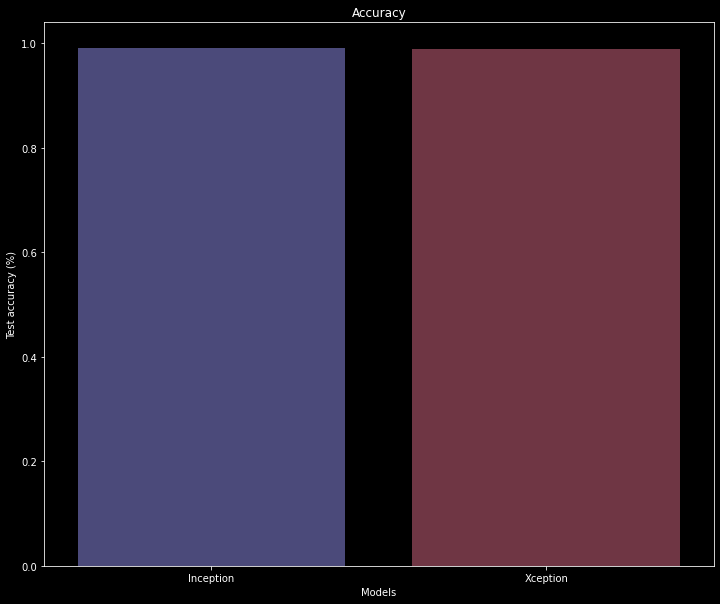

In [36]:
plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models_testset['Test accuracy (%)'], x = df_all_models_testset['Model'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()